<a href="https://colab.research.google.com/github/lava99-bliss/Tensorflow/blob/main/03_Computer_Vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We use CNN to this.

input image -> output what is it?



Introduction to CNN and computer vision with Tensorflow

computer vision -can discover patterns in visual data

dta set - food101

modified set has only 2 classes (pizza and steak)

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the download
zip_ref= zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-10 07:39:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.5MB/s    in 3.1s    

2023-07-10 07:39:52 (33.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect data(look closely)

this usually means visualizing many samples of your data

In [2]:
#list (tree in folders)
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/test

pizza  steak


In [4]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [5]:
import os

#walk through pizza_steak sirectory and list number of files
for dirpath,dirnames,filesnames in os.walk("pizza_steak"):
  print(F"There are {len(dirnames)} directories and {len(filesnames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.


test data - 750 images

treain data - 250 images




In [6]:
#another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_test= len(os.listdir("pizza_steak/test/steak"))
print(num_steak_images_train,num_steak_images_test)

750 250


##Let's visualize dtaa

In [7]:
#get the class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class_names for the subdirs
class_names= class_names[1:]
print(class_names)


['steak']


In [8]:
#let's visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #set up a target dir
  target_folder = target_dir + target_class

  #get a random image path (only image name is going to print)
  random_image= random.sample(os.listdir(target_folder),1)
  print(random_image)

  #PLOT IT USING MATPLOTLIB
  img= mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

['786995.jpg']


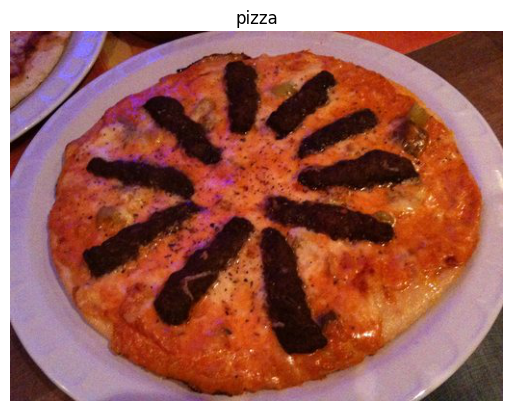

In [9]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")


In [10]:
import tensorflow as tf
tf.constant(img)

# 1 pixel -> [R G B]

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[138,  79,  81],
        [153,  94,  96],
        [152,  92,  94],
        ...,
        [ 75,  29,  32],
        [ 76,  27,  31],
        [ 73,  24,  30]],

       [[131,  71,  73],
        [138,  78,  80],
        [148,  88,  90],
        ...,
        [ 78,  32,  34],
        [ 78,  29,  32],
        [ 74,  25,  28]],

       [[133,  73,  75],
        [141,  81,  83],
        [145,  83,  86],
        ...,
        [ 77,  32,  29],
        [ 73,  28,  25],
        [ 70,  22,  22]],

       ...,

       [[ 67,  32,  39],
        [ 71,  36,  43],
        [ 68,  33,  40],
        ...,
        [ 74,  63,  57],
        [ 78,  64,  63],
        [ 83,  69,  69]],

       [[ 66,  31,  38],
        [ 67,  32,  39],
        [ 63,  28,  35],
        ...,
        [ 77,  67,  58],
        [ 81,  67,  64],
        [ 84,  70,  70]],

       [[ 73,  38,  45],
        [ 72,  37,  44],
        [ 69,  34,  41],
        ...,
        [ 75,  65,  5

In [11]:
img.shape # width,height,color channel

(384, 512, 3)

In [12]:
#Get all pix values in 0-1

img/225

array([[[0.61333333, 0.35111111, 0.36      ],
        [0.68      , 0.41777778, 0.42666667],
        [0.67555556, 0.40888889, 0.41777778],
        ...,
        [0.33333333, 0.12888889, 0.14222222],
        [0.33777778, 0.12      , 0.13777778],
        [0.32444444, 0.10666667, 0.13333333]],

       [[0.58222222, 0.31555556, 0.32444444],
        [0.61333333, 0.34666667, 0.35555556],
        [0.65777778, 0.39111111, 0.4       ],
        ...,
        [0.34666667, 0.14222222, 0.15111111],
        [0.34666667, 0.12888889, 0.14222222],
        [0.32888889, 0.11111111, 0.12444444]],

       [[0.59111111, 0.32444444, 0.33333333],
        [0.62666667, 0.36      , 0.36888889],
        [0.64444444, 0.36888889, 0.38222222],
        ...,
        [0.34222222, 0.14222222, 0.12888889],
        [0.32444444, 0.12444444, 0.11111111],
        [0.31111111, 0.09777778, 0.09777778]],

       ...,

       [[0.29777778, 0.14222222, 0.17333333],
        [0.31555556, 0.16      , 0.19111111],
        [0.30222222, 0





*   Load images
*   Preprocess
*   Build a CNN to find patterns in images
*   Compile the CNN
*   Fit CNN to training data






#Using GPU as runtime hardware

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (0-1 normalizing/scaling)
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)  #test data

#set path dir s
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from dirs and turn into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode= "binary",
                                               seed=42)
valid_data = train_datagen.flow_from_directory(directory= test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode= "binary",
                                               seed=42)
#build CNN
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=  tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_1= model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 259ms/step - loss: 0.6203 - accuracy: 0.6600 - val_loss: 0.5717 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4674 - accuracy: 0.7793 - val_loss: 0.3835 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4116 - accuracy: 0.8180 - val_loss: 0.3649 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3627 - accuracy: 0.8507 - val_loss: 0.3178 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3241 - accuracy: 0.8667 - val_loss: 0.3149 - val_accuracy: 0.8800


In [14]:
tf.random.set_seed(42)


model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])

model_2.compile(loss="binary_crossentropy",
                optimizer=  tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_2= model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data, #test data
                       validation_steps= len(valid_data))


Epoch 1/5
47/47 [==============================] - 15s 297ms/step - loss: 0.2684 - accuracy: 0.8980 - val_loss: 0.3017 - val_accuracy: 0.8820
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.1973 - accuracy: 0.9360 - val_loss: 0.2966 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.1354 - accuracy: 0.9613 - val_loss: 0.2987 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.0786 - accuracy: 0.9773 - val_loss: 0.3762 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.0469 - accuracy: 0.9887 - val_loss: 0.4118 - val_accuracy: 0.8420


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20X more Total params than model_1, model_2 performs terribly(lowwer accuracy)

let's improve it

In [17]:
tf.random.set_seed(42)


model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])

model_3.compile(loss="binary_crossentropy",
                optimizer=  tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_3= model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data, #test data
                       validation_steps= len(valid_data))


Epoch 1/5
47/47 [==============================] - 15s 286ms/step - loss: 4.5982 - accuracy: 0.6100 - val_loss: 1.3601 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 1.2389 - accuracy: 0.6947 - val_loss: 0.7406 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6121 - accuracy: 0.7560 - val_loss: 0.4940 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5794 - accuracy: 0.7500 - val_loss: 0.5183 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.9120 - accuracy: 0.6927 - val_loss: 0.8356 - val_accuracy: 0.6680


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


#Binary classification: Let's break it down
We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)

2. Preprocess the data (prepare it for a model)

3. Create a model (start with a baseline)

4. Fit the model

5. Evaluate the model

6. Adjust different parameters and improve model (try to beat your baseline)

7. Repeat until satisfied
Let's step through each.

#1. Become one with the data (visualize, visualize, visualize...)

['1828502.jpg']
['2412237.jpg']


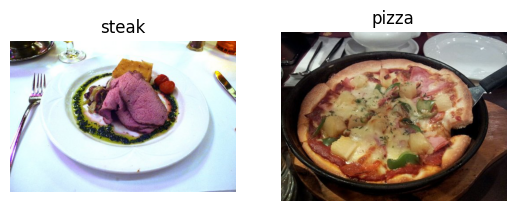

In [19]:
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img= view_random_image("pizza_steak/train/","pizza")

#2. Preprocess the data (prepare it for a model)

In [20]:
#define directories datasets
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#turn to batches
#batch- small subset that model looks at a time (32 images at a time)

#create train and test data generators and rescale the dta
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 #divide all pix values by 255
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [21]:
#turn to batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory
                                               target_size=(224,224), #(height,width)
                                               class_mode="binary", #type of data you are working with
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
#get a sample of a train data batch
images,labels= train_data.next() #get the next batch
len(images)

32

In [23]:
len(train_data)

47

In [24]:
#how many batches we have
1500/32

46.875

#3.Create a model CNN(start with a baseline) Fit the model

In [25]:
#le's make it little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [26]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"), #filters,kernal_size, others have default values
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #working with binary classification(so 1 output neuron)
])


In [27]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#4. Fit the model


In [28]:
history_4= model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data, #test data
                       validation_steps= len(test_data))


Epoch 1/5
47/47 [==============================] - 14s 250ms/step - loss: 0.6986 - accuracy: 0.6867 - val_loss: 0.4565 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4218 - accuracy: 0.8240 - val_loss: 0.4602 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3575 - accuracy: 0.8487 - val_loss: 0.4025 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.2216 - accuracy: 0.9240 - val_loss: 0.3482 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.1000 - accuracy: 0.9747 - val_loss: 0.3972 - val_accuracy: 0.8400


#5.Evaluate the model

<Axes: >

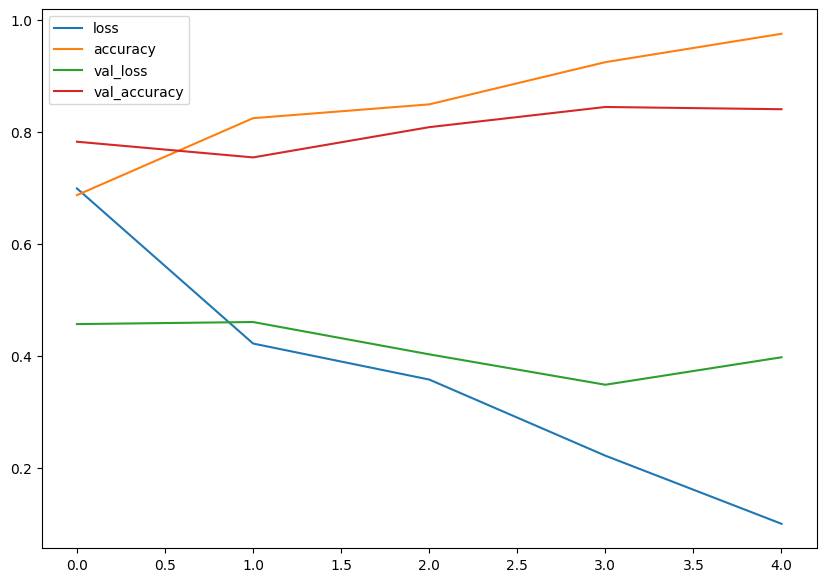

In [29]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [30]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

   #plot accuracy
  plt.figure()  #create a nig fig
  plt.plot(epochs,loss,label="training_accuracy")
  plt.plot(epochs,val_loss,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

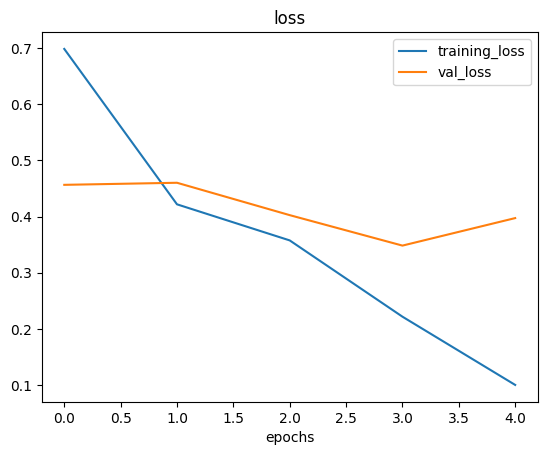

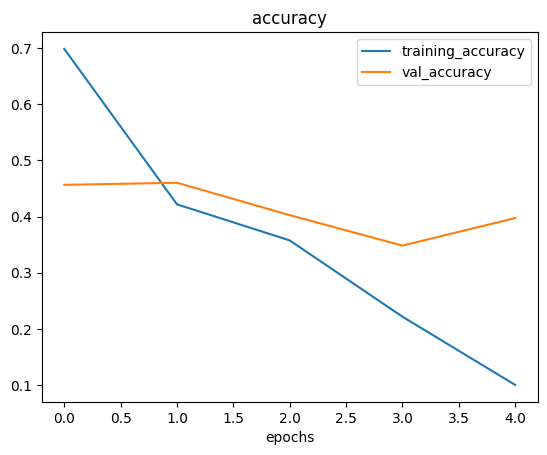

In [31]:
#check loss and accuracy
plot_loss_curves(history_4)

mm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

#6.Adjust different parameters and improve model (try to beat your baseline)

ways to induce overfitting,

*   Increase the number of conv layers
*   increase the number of conv filters
*   add another dense layer to the output of our fllateened layer

ways to reduce overfitting,

*   Add data augmentation
*   Add regularized layers(maxpool..)
*   ada more data




In [32]:
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"), #filters,kernal_size, others have default values
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid") #working with binary classification(so 1 output neuron)
])


In [33]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
history_5= model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data, #test data
                       validation_steps= len(test_data))


Epoch 1/5
47/47 [==============================] - 15s 269ms/step - loss: 0.5982 - accuracy: 0.6527 - val_loss: 0.4319 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 0.4677 - accuracy: 0.7880 - val_loss: 0.4006 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4251 - accuracy: 0.8173 - val_loss: 0.3699 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 12s 262ms/step - loss: 0.4108 - accuracy: 0.8227 - val_loss: 0.3507 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 12s 266ms/step - loss: 0.3767 - accuracy: 0.8433 - val_loss: 0.3285 - val_accuracy: 0.8820


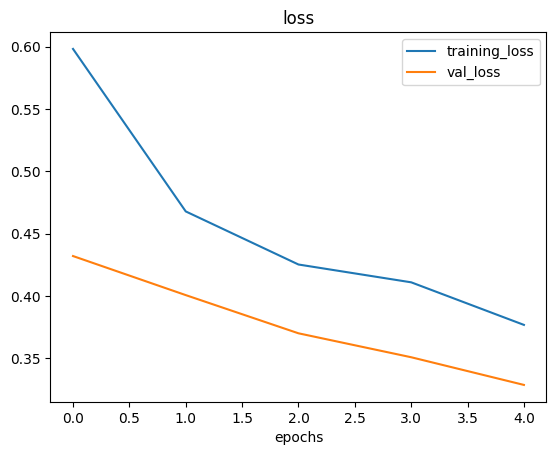

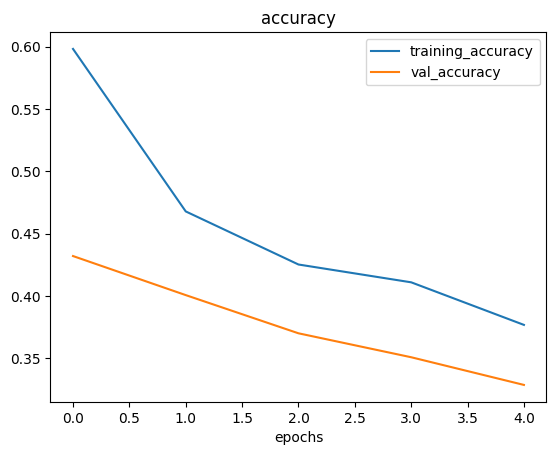

In [35]:
plot_loss_curves(history_5)

### opening our bag of tricks and finding data augmentation


In [36]:

#create ImageDataGenerator training instances with data

train_datagen_augmented = ImageDataGenerator(rescale=1/225.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.3,
                                             horizontal_flip=True)

#create ImageDataGenerator without augmentation
train_datagen=ImageDataGenerator(rescale=1/225.)

#create ImageDataGenerator without augmentation for test set
test_datagen=ImageDataGenerator(rescale=1/225.)


##Data Augmentation

In [37]:


# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Augemented is used usually for train data. It will remain in the same directory but modified.


In [38]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay

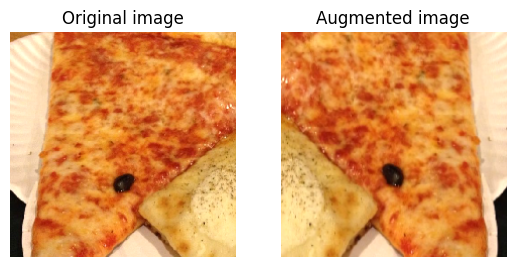

In [39]:

# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.figure()
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


#Build a model using augmented data

In [40]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"), #filters,kernal_size, others have default values
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid") #working with binary classification(so 1 output neuron)
])
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6= model_6.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data, #test data
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 526ms/step - loss: 0.7098 - accuracy: 0.5087 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 525ms/step - loss: 0.7036 - accuracy: 0.4040 - val_loss: 0.6856 - val_accuracy: 0.5400
Epoch 3/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6889 - accuracy: 0.5760 - val_loss: 0.6640 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 37s 796ms/step - loss: 0.6987 - accuracy: 0.6080 - val_loss: 0.6560 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6782 - accuracy: 0.5987 - val_loss: 0.6166 - val_accuracy: 0.6760


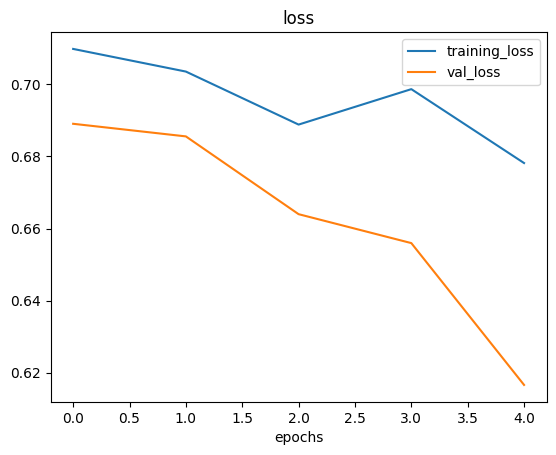

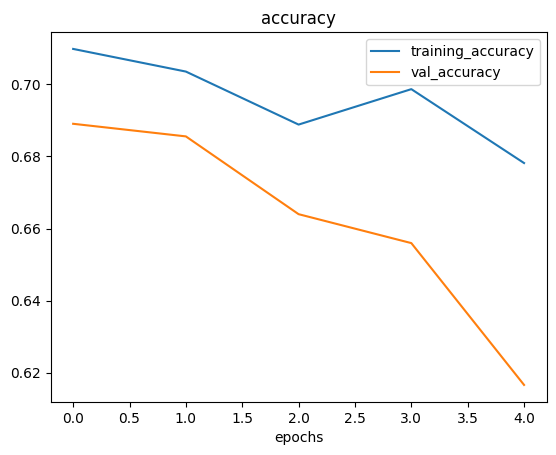

In [41]:
plot_loss_curves(history_6)

In [43]:
 #let's shuffle our augmentd data and train another set
train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            shuffle=True,
                                            batch_size=32)

model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"), #filters,kernal_size, others have default values
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid") #working with binary classification(so 1 output neuron)
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7= model_7.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data, #test data
                       validation_steps= len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 535ms/step - loss: 0.7285 - accuracy: 0.6087 - val_loss: 0.6668 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6902 - accuracy: 0.5380 - val_loss: 0.6618 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6849 - accuracy: 0.5747 - val_loss: 0.6367 - val_accuracy: 0.7000
Epoch 4/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6999 - accuracy: 0.5880 - val_loss: 0.6569 - val_accuracy: 0.5220
Epoch 5/5
47/47 [==============================] - 25s 532ms/step - loss: 0.7004 - accuracy: 0.5207 - val_loss: 0.6342 - val_accuracy: 0.7200


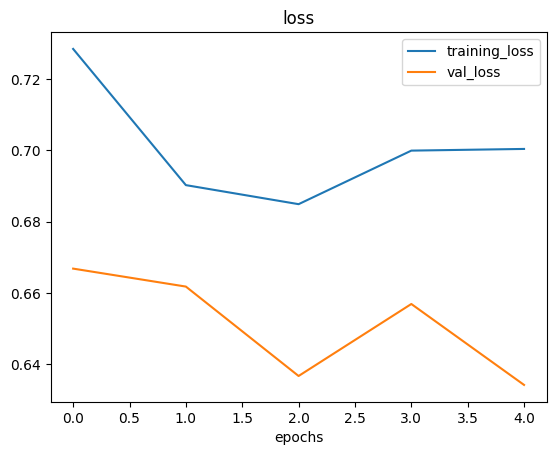

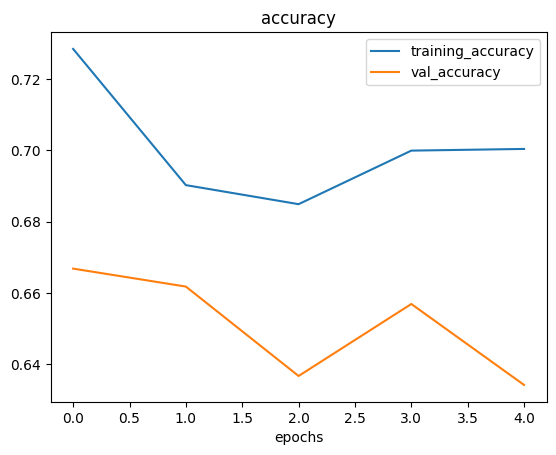

In [44]:
plot_loss_curves(history_7)